# Applied ML

We will apply Machine Learning to an interesting dataset about soccer players and referees.
The work will be divided in two parts, first a pre-processing + visualization pipeline to get comfortable with the data, and finally the prediction tasks, where the color of the skin of players will be inferered from other different parameters (features).

In [47]:
# A number of libraries will be used:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

### 1. Pre-processing and Visualization

#### 1.1 Pre-processing

In [2]:
#Loading the data to a DataFrame
df = pd.read_csv('CrowdstormingDataJuly1st.csv')
df.head()

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,...,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,...,0.50,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,...,0.75,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504
2,abdon-prats,Abdón Prats,RCD Mallorca,Spain,17.12.1992,181.0,79.0,NaN,1,0,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
3,pablo-mari,Pablo Marí,RCD Mallorca,Spain,31.08.1993,191.0,87.0,Center Back,1,1,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
4,ruben-pena,Rubén Peña,Real Valladolid,Spain,18.07.1991,172.0,70.0,Right Midfielder,1,1,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002


In [3]:
# Just by descibing the data we notice how incomplete it is
df.describe()

C:\Users\dunay\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,height,weight,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,rater1,rater2,refNum,refCountry,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
count,145765.000000,143785.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,124621.000000,124621.000000,146028.000000,146028.000000,145865.000000,1.458650e+05,1.458650e+05,145865.000000,1.458650e+05,145865.000000
mean,181.935938,76.075662,2.921166,1.278344,0.708241,0.934581,0.338058,0.385364,0.011381,0.012559,0.264255,0.302862,1534.827444,29.642842,0.346276,1.969741e+04,6.310849e-04,0.452026,2.044023e+04,0.002994
std,6.738726,7.140906,3.413633,1.790725,1.116793,1.383059,0.906481,0.795333,0.107931,0.112889,0.295382,0.293020,918.736625,27.496189,0.032246,1.271262e+05,4.735857e-03,0.217469,1.306157e+05,0.019723
min,161.000000,54.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-0.047254,2.000000e+00,2.235373e-07,-1.375000,2.000000e+00,0.000001
25%,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,641.000000,7.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,1604.000000,21.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,3.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,NaN,NaN,2345.000000,44.000000,NaN,NaN,NaN,NaN,NaN,NaN
max,203.000000,100.000000,47.000000,29.000000,14.000000,18.000000,23.000000,14.000000,3.000000,2.000000,1.000000,1.000000,3147.000000,161.000000,0.573793,1.975803e+06,2.862871e-01,1.800000,2.029548e+06,1.060660


Having in mind that our final goal is to predict the skintone, we can already get rid of all the rows that don't have this. Also we need to create an aggregate of the two raters scores to act as our labels for classification.

In [4]:
df1 = df.dropna(axis=0, subset=['rater1', 'rater2'], how='any')

#For the aggregate, the simplest thing is to compute the mean, although it will increase the possible "skintones" from
# 5 to 9! We multiply by 8 as a trick to make everything intergers instead of floats. This would be needed in randomForest.
df1['Skintone']= (df1['rater1']+df1['rater2'])*8/2 
df1.Skintone.value_counts()

C:\Users\dunay\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2.0    38517
0.0    33723
1.0    17876
4.0     8989
8.0     7570
6.0     7079
3.0     5609
7.0     2841
5.0     2417
Name: Skintone, dtype: int64

There are many parameters that simply wont help to discriminate between skintone. We can dispose of them.

In [ ]:
df1.drop('player', axis=1, inplace=True)      #The name is no use, we keep playerShort as the identifier
df1.drop('photoID', axis=1, inplace=True)     #Trash
df1.drop('rater1', axis=1, inplace=True)      #Not needed anymore
df1.drop('rater2', axis=1, inplace=True)      #Not needed anymore
df1.drop('refNum', axis=1, inplace=True)      #Referee should be independent or at most correlated through country
df1.drop('refCountry', axis=1, inplace=True)  #refCountry because it feels like cheating to look into the country of origin
df1.drop('Alpha_3', axis=1, inplace=True)     #Alpha_3 because it feels like cheating to look into the country of origin
df1.drop('meanIAT', axis=1, inplace=True)     #Because we are going to group by playerShort and referee data cannot be mixed
df1.drop('nIAT', axis=1, inplace=True)        #Because we are going to group by playerShort and referee data cannot be mixed
df1.drop('seIAT', axis=1, inplace=True)       #Because we are going to group by playerShort and referee data cannot be mixed
df1.drop('meanExp', axis=1, inplace=True)     #Because we are going to group by playerShort and referee data cannot be mixed
df1.drop('nExp', axis=1, inplace=True)        #Because we are going to group by playerShort and referee data cannot be mixed
df1.drop('seExp', axis=1, inplace=True)       #Because we are going to group by playerShort and referee data cannot be mixed

In [6]:
df1.head()

,playerShort,club,leagueCountry,birthday,height,weight,position,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,Skintone
0,lucas-wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,0,1,0,0,0,0,3.0
1,john-utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,0,1,0,1,0,0,6.0
5,aaron-hughes,Fulham FC,England,08.11.1979,182.0,71.0,Center Back,1,0,0,1,0,0,0,0,1.0
6,aleksandar-kolarov,Manchester City,England,10.11.1985,187.0,80.0,Left Fullback,1,1,0,0,0,0,0,0,1.0
7,alexander-tettey,Norwich City,England,04.04.1986,180.0,68.0,Defensive Midfielder,1,0,0,1,0,0,0,0,8.0


In [7]:
df1.shape

(124621, 16)

In [8]:
#we eliminate all the rows with missing values of interest
df2 = df1.dropna(axis=0, how='any')
df2.shape

(115603, 16)

We have trashed around 10% of the data, but we believe it is acceptable as we still have over 100k entries left.

Now we will split the data in two, to make the aggregation by player easier. This is done separating sumable feature from those that are not summable. We asumme that the player remains in the same "club" (and the same "leagueCountry"  consequentially), with the same "position" for the entire season (2012-2013). We also assume honesty from the referees (no racism) which leads as to discard all the data related to the referee as it is assumed independent from the skintone.

In [9]:
#In both cases we keep the identifier
df_summable = df2.loc[:,["playerShort", "games", "victories", "ties", "defeats", "goals", "yellowCards", "yellowReds", "redCards"]]
df_non_summable = df2.loc[:,["playerShort", "club", "leagueCountry", "birthday", "height", "weight", "position", "Skintone"]]


In [10]:
# And addition for the summables
df_g_summable = df_summable.groupby(['playerShort']).mean()
df_g_summable.head()

,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards
playerShort,,,,,,,,
aaron-hughes,3.939759,1.487952,1.078313,1.373494,0.054217,0.114458,0.000000,0.000000
aaron-hunt,3.393939,1.424242,0.737374,1.232323,0.626263,0.424242,0.000000,0.010101
aaron-lennon,4.079208,1.980198,0.960396,1.138614,0.306931,0.108911,0.000000,0.000000
aaron-ramsey,2.500000,1.442308,0.403846,0.653846,0.375000,0.298077,0.000000,0.009615
abdelhamid-el-kaoutari,3.351351,1.108108,1.081081,1.162162,0.027027,0.216216,0.108108,0.054054


In [11]:
# Simply drop duplicates for the non-summables
df_g_non_summable = df_non_summable.drop_duplicates(subset='playerShort', keep='first').set_index(['playerShort'])
df_g_non_summable.sort_index().head()

,club,leagueCountry,birthday,height,weight,position,Skintone
playerShort,,,,,,,
aaron-hughes,Fulham FC,England,08.11.1979,182.0,71.0,Center Back,1.0
aaron-hunt,Werder Bremen,Germany,04.09.1986,183.0,73.0,Attacking Midfielder,1.0
aaron-lennon,Tottenham Hotspur,England,16.04.1987,165.0,63.0,Right Midfielder,2.0
aaron-ramsey,Arsenal FC,England,26.12.1990,178.0,76.0,Center Midfielder,0.0
abdelhamid-el-kaoutari,Montpellier HSC,France,17.03.1990,180.0,73.0,Center Back,2.0


In [12]:
# We check that each has the same number of rows
print(df_g_summable.shape)
print(df_g_non_summable.shape)

(1419, 8)
(1419, 7)


In [13]:
# Merging the two again
df_by_player = pd.concat([df_g_non_summable, df_g_summable], axis=1, join='outer')
df_by_player.head()

,club,leagueCountry,birthday,height,weight,position,Skintone,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards
aaron-hughes,Fulham FC,England,08.11.1979,182.0,71.0,Center Back,1.0,3.939759,1.487952,1.078313,1.373494,0.054217,0.114458,0.000000,0.000000
aaron-hunt,Werder Bremen,Germany,04.09.1986,183.0,73.0,Attacking Midfielder,1.0,3.393939,1.424242,0.737374,1.232323,0.626263,0.424242,0.000000,0.010101
aaron-lennon,Tottenham Hotspur,England,16.04.1987,165.0,63.0,Right Midfielder,2.0,4.079208,1.980198,0.960396,1.138614,0.306931,0.108911,0.000000,0.000000
aaron-ramsey,Arsenal FC,England,26.12.1990,178.0,76.0,Center Midfielder,0.0,2.500000,1.442308,0.403846,0.653846,0.375000,0.298077,0.000000,0.009615
abdelhamid-el-kaoutari,Montpellier HSC,France,17.03.1990,180.0,73.0,Center Back,2.0,3.351351,1.108108,1.081081,1.162162,0.027027,0.216216,0.108108,0.054054


An extra transformation that seems reasonable is to change the "birthday" parameter for an "age" parameter

In [14]:
# Transform to datetime and substract to the season's year when we collected the data
df_by_player['age'] = pd.to_datetime(df_by_player.birthday).map(lambda x: 2012 - x.year)
df_by_player.age.head()

aaron-hughes              33
aaron-hunt                26
aaron-lennon              25
aaron-ramsey              22
abdelhamid-el-kaoutari    22
Name: age, dtype: int64

In [15]:
# We can now drop the "birthday" parameter
df_by_player.drop('birthday', axis=1, inplace=True)
df_by_player.head()

,club,leagueCountry,height,weight,position,Skintone,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,age
aaron-hughes,Fulham FC,England,182.0,71.0,Center Back,1.0,3.939759,1.487952,1.078313,1.373494,0.054217,0.114458,0.000000,0.000000,33
aaron-hunt,Werder Bremen,Germany,183.0,73.0,Attacking Midfielder,1.0,3.393939,1.424242,0.737374,1.232323,0.626263,0.424242,0.000000,0.010101,26
aaron-lennon,Tottenham Hotspur,England,165.0,63.0,Right Midfielder,2.0,4.079208,1.980198,0.960396,1.138614,0.306931,0.108911,0.000000,0.000000,25
aaron-ramsey,Arsenal FC,England,178.0,76.0,Center Midfielder,0.0,2.500000,1.442308,0.403846,0.653846,0.375000,0.298077,0.000000,0.009615,22
abdelhamid-el-kaoutari,Montpellier HSC,France,180.0,73.0,Center Back,2.0,3.351351,1.108108,1.081081,1.162162,0.027027,0.216216,0.108108,0.054054,22


The final step is to transform categorical variables to dummy variables, that are more friendly to machine learning algorithms. An important note is that this greatly increases the number of features due to the huge number of clubs, and makes us vulnerable to the curse of dimensionality as well as overfitting.

In [16]:
data = pd.get_dummies(df_by_player)
data.head()

,height,weight,Skintone,games,victories,ties,defeats,goals,yellowCards,yellowReds,...,position_Center Forward,position_Center Midfielder,position_Defensive Midfielder,position_Goalkeeper,position_Left Fullback,position_Left Midfielder,position_Left Winger,position_Right Fullback,position_Right Midfielder,position_Right Winger
aaron-hughes,182.0,71.0,1.0,3.939759,1.487952,1.078313,1.373494,0.054217,0.114458,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aaron-hunt,183.0,73.0,1.0,3.393939,1.424242,0.737374,1.232323,0.626263,0.424242,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aaron-lennon,165.0,63.0,2.0,4.079208,1.980198,0.960396,1.138614,0.306931,0.108911,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
aaron-ramsey,178.0,76.0,0.0,2.500000,1.442308,0.403846,0.653846,0.375000,0.298077,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abdelhamid-el-kaoutari,180.0,73.0,2.0,3.351351,1.108108,1.081081,1.162162,0.027027,0.216216,0.108108,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


A different approach that is also worth trying, and that aims to avoid the feature space explosion, is to go from categorical strings to numerical codes that can be handled by a random forest. The interpretability of the results can be however much more tricky.

In [26]:
cat_columns = df_by_player.select_dtypes(['object']).columns
cat_columns

Index(['club', 'leagueCountry', 'position'], dtype='object')

In [29]:
data1 = df_by_player
data1[cat_columns] = df_by_player[cat_columns].apply(lambda x: x.astype('category').cat.codes)
data1.head()

,club,leagueCountry,height,weight,position,Skintone,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,age
aaron-hughes,33,0,182.0,71.0,1,1.0,3.939759,1.487952,1.078313,1.373494,0.054217,0.114458,0.000000,0.000000,33
aaron-hunt,86,2,183.0,73.0,0,1.0,3.393939,1.424242,0.737374,1.232323,0.626263,0.424242,0.000000,0.010101,26
aaron-lennon,79,0,165.0,63.0,10,2.0,4.079208,1.980198,0.960396,1.138614,0.306931,0.108911,0.000000,0.000000,25
aaron-ramsey,6,0,178.0,76.0,3,0.0,2.500000,1.442308,0.403846,0.653846,0.375000,0.298077,0.000000,0.009615,22
abdelhamid-el-kaoutari,48,1,180.0,73.0,1,2.0,3.351351,1.108108,1.081081,1.162162,0.027027,0.216216,0.108108,0.054054,22


The data is ready. Now we can do some extra visualizations or go directry to the machine learning tasks

#### 1.2 Visualization

### 2. Machine Learning

In [17]:
#Seed initialization for repeatability
np.random.seed(seed=42) #The answer is 42 ;)

Splitting the data into working blocks (for our two versions)

In [30]:
from sklearn.model_selection import train_test_split

# Firts lets separate our data in train and test sets:
d_train, d_test = train_test_split(data, test_size = 0.2)
d1_train, d1_test = train_test_split(data1, test_size = 0.2)


# And now separate features from labels:
train  = d_train.drop('Skintone', axis=1)
train1  = d1_train.drop('Skintone', axis=1)
tr_target = d_train.Skintone.values.tolist()
tr_target1 = d1_train.Skintone.values.tolist()
test = d_test.drop('Skintone', axis=1)
test1 = d1_test.drop('Skintone', axis=1)
te_target = d_test.Skintone.values.tolist()
te_target1 = d1_test.Skintone.values.tolist()

#### 2.1 Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

'''
RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2,
  min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', 
  max_leaf_nodes=None, min_impurity_split=1e-07, bootstrap=True, oob_score=False, 
  n_jobs=1, random_state=None, verbose=0, warm_start=False, class_weight=None)[source]

'''

# Attempt 1
rf = RandomForestClassifier()
rf.fit(train, tr_target)
rf.score(test, te_target)

0.30281690140845069

For a 9-class classification, an accuracy close to 30% doesn't seem bad. But is it really? What if we only predict the most common Skintone?

In [20]:
d_train.Skintone.value_counts().iloc[1]/d_train.Skintone.count() # most common number counts / total counts

0.28105726872246695

After doing this check, we can now really tell that our classifier is actually doing practically nothing :(

We wonder if we are overfitting the data, a quick check is to see how good is the performance in train data. If it is much more accurate, it would be overfitting.

In [21]:
rf.score(train, tr_target)

0.97973568281938328

Overfitting indeed

Trying with the data without dummy variables:

In [31]:
# Attempt 2
rf = RandomForestClassifier()
rf.fit(train1, tr_target1)
rf.score(test1, te_target1)

0.30633802816901406

In [32]:
rf.score(train1, tr_target1)

0.98237885462555063

Almost the same performance and overfitting. Being these features lower-dimensional and equally powerful we will continue with them.

Random forest is itself a way of fighting against overfitting in a decission tree. By increasing the number of trees in the forest overfitting shoud decrease respectively. We can study this:

In [59]:
# We will loop for different number of trees in the forest,
# and track how good is the performance in training and test data.
score_on_test = list()
score_on_train = list()
num_trees = range(10,110,10)
for i in num_trees:
    rf = RandomForestClassifier(n_estimators = i, bootstrap=True)
    rf.fit(train1, tr_target1)
    score_on_test.append(rf.score(test1, te_target1))
    score_on_train.append(rf.score(train1, tr_target1))

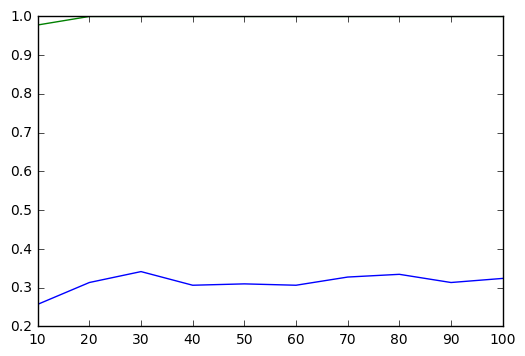

In [60]:
plt.plot(num_trees, score_on_test, num_trees, score_on_train)

Slightly improvement on test set, still overfitting too much. We will continue with 30 estimators

Another easy way to control overfitting in a random fores is by regulating the maximum depth the trees can take:

In [77]:
# We will loop for different depths of trees in the forest,
# and track how good is the performance in training and test data.
score_on_test = list()
score_on_train = list()
depth = range(1,10)
for i in depth:
    rf = RandomForestClassifier(n_estimators = 30, max_depth=i, bootstrap=True)
    rf.fit(train1, tr_target1)
    score_on_test.append(rf.score(test1, te_target1))
    score_on_train.append(rf.score(train1, tr_target1))

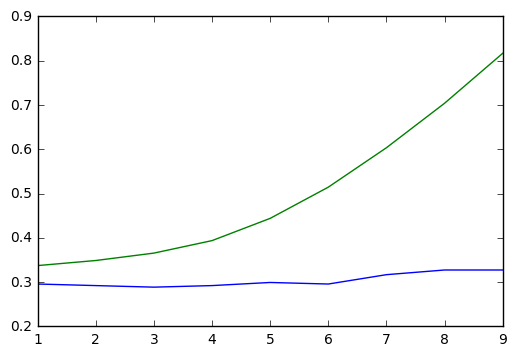

In [78]:
plt.plot(depth, score_on_test, depth, score_on_train)

Practically flat after the very first split!

In [80]:
#Looking into the feature importance:
f_importances = rf.feature_importances_
f_importances

array([ 0.08230337,  0.04562049,  0.06851107,  0.07215266,  0.05230856,
        0.08616321,  0.09501967,  0.08117544,  0.08751714,  0.07526021,
        0.08738693,  0.05117529,  0.05435697,  0.061049  ])

#### 2.2 Unsupervised Learning 

In [22]:
#kmeans k =2?